# Outcome calculations and binning

In [10]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [11]:
# Load data
df = pd.read_csv('cleaned_dataframe.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


In [12]:
# Create diabetes_outcome bins
bins = [0, 100, 126, 300]
labels = ['normal', 'prediabetic','diabetic']

# Generate a new categorical column diabetes_outcome
df['diabetes_outcome'] = pd.cut(df['avg_glucose_level'], bins, labels=labels)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,diabetes_outcome
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,diabetic
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1,diabetic
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,prediabetic
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,diabetic
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,diabetic
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0,normal
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,prediabetic
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,normal
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,diabetic


In [13]:
# Create bmi_outcome bins
bmi_bins = [0, 18.5, 25, 30, 35, 100]
bmi_labels = ['und_weight', 'normal', 'overweight', 'obese', 'ext_obese']

df['bmi_outcome'] = pd.cut(df['bmi'], bmi_bins, labels=bmi_labels)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,diabetes_outcome,bmi_outcome
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,diabetic,ext_obese
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1,diabetic,overweight
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,prediabetic,obese
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,diabetic,obese
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,diabetic,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0,normal,overweight
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,prediabetic,ext_obese
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,normal,obese
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,diabetic,overweight


In [14]:
# Calculate the risk factor for each row in the dataframe
# Based on risk factors from: https://www.phoebehealth.com/services/stroke-treatment/neurosciences-stroke-risk-factors
def calculate_risk(x):
    diabetes_risk = 1 if x.diabetes_outcome in ['prediabetic', 'diabetic'] else 0  # Assign glucose risk value based on glucose level category
    bmi_risk = 1 if x.bmi_outcome in ['overweight', 'obese', 'ext_obese'] else 0  # Assign BMI risk value based on BMI category
    stroke_risk = 1 if x.stroke == 1 else 0
    hypertension_risk = 1 if x.hypertension == 1 else 0  # Assign hypertension risk value based on hypertension status
    heart_disease_risk = 1 if x.heart_disease == 1 else 0  # Assign heart disease risk value based on heart disease status
    smoking_status_risk = 1 if x.smoking_status in ['formerly smoked', 'smokes'] else 0  # Assign smoking status risk value based on smoking status
    age_risk = 1 if x.age >= 55 else 0
    gender_risk = 1 if x.gender in ['Female'] else 0
    
    # let's calculate the total risk factor
    total_risk = diabetes_risk + smoking_status_risk + heart_disease_risk + bmi_risk + hypertension_risk + stroke_risk + age_risk + gender_risk
    return total_risk

# Apply calculate_risk function to each row in the df data frame, and assign the result to a new column called 'risk factor'
df['risk_factor'] = df.apply(calculate_risk, axis=1)

df


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,diabetes_outcome,bmi_outcome,risk_factor
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,diabetic,ext_obese,6
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1,diabetic,overweight,5
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,prediabetic,obese,5
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,diabetic,obese,5
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,diabetic,normal,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0,normal,overweight,4
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,prediabetic,ext_obese,4
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,normal,obese,2
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,diabetic,overweight,3


In [15]:
# Find risk_factor unique values to create bins
df['risk_factor'].unique()

array([6, 5, 3, 4, 7, 2, 8, 0, 1], dtype=int64)

In [16]:
# Create risk_factor bins
rf_bins = [0, 1, 3, 8]
rf_labels = ['low', 'caution', 'high']

df['risk_outcome'] = pd.cut(df['risk_factor'], rf_bins, labels=rf_labels)

df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,diabetes_outcome,bmi_outcome,risk_factor,risk_outcome
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1,diabetic,ext_obese,6,high
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.89,never smoked,1,diabetic,overweight,5,high
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1,prediabetic,obese,5,high
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.40,smokes,1,diabetic,obese,5,high
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1,diabetic,normal,5,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,80.0,1,0,Yes,Private,Urban,83.75,28.89,never smoked,0,normal,overweight,4,high
5105,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0,prediabetic,ext_obese,4,high
5106,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0,normal,obese,2,caution
5107,Male,51.0,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0,diabetic,overweight,3,caution


In [17]:
# one hot encoding to categories
df_encode = pd.get_dummies(data=df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status', 'diabetes_outcome', 'bmi_outcome','risk_outcome'])
df_encode

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,risk_factor,gender_Female,gender_Male,...,diabetes_outcome_prediabetic,diabetes_outcome_diabetic,bmi_outcome_und_weight,bmi_outcome_normal,bmi_outcome_overweight,bmi_outcome_obese,bmi_outcome_ext_obese,risk_outcome_low,risk_outcome_caution,risk_outcome_high
0,67.0,0,1,Yes,228.69,36.60,1,6,0,1,...,0,1,0,0,0,0,1,0,0,1
1,61.0,0,0,Yes,202.21,28.89,1,5,1,0,...,0,1,0,0,1,0,0,0,0,1
2,80.0,0,1,Yes,105.92,32.50,1,5,0,1,...,1,0,0,0,0,1,0,0,0,1
3,49.0,0,0,Yes,171.23,34.40,1,5,1,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,Yes,174.12,24.00,1,5,1,0,...,0,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,80.0,1,0,Yes,83.75,28.89,0,4,1,0,...,0,0,0,0,1,0,0,0,0,1
5105,81.0,0,0,Yes,125.20,40.00,0,4,1,0,...,1,0,0,0,0,0,1,0,0,1
5106,35.0,0,0,Yes,82.99,30.60,0,2,1,0,...,0,0,0,0,0,1,0,0,1,0
5107,51.0,0,0,Yes,166.29,25.60,0,3,0,1,...,0,1,0,0,1,0,0,0,1,0


In [18]:
# View original dataframe columns
list(df.columns.values)

['gender',
 'age',
 'hypertension',
 'heart_disease',
 'ever_married',
 'work_type',
 'Residence_type',
 'avg_glucose_level',
 'bmi',
 'smoking_status',
 'stroke',
 'diabetes_outcome',
 'bmi_outcome',
 'risk_factor',
 'risk_outcome']

# Plot graphs

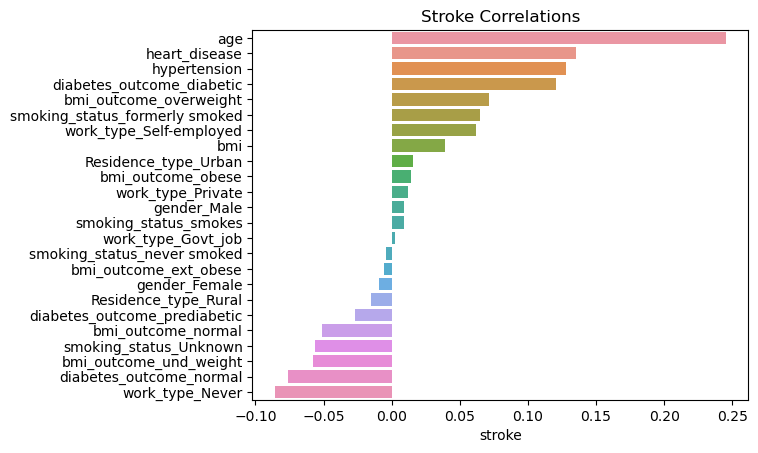

In [19]:
# Plot stroke correlation
corr = df_encode.corr()["stroke"].sort_values(ascending=False)
corr.drop(['stroke','risk_factor','risk_outcome_high','avg_glucose_level','risk_outcome_low','risk_outcome_caution'], inplace=True)

corr_plot = sns.barplot(x=corr, y=corr.index).set(title='Stroke Correlations')

# Save image
plt.savefig("Images/Stroke_Correlation.png", bbox_inches="tight")

In [20]:
# Find the sum of strokes
stroke = df_encode.loc[(df_encode['stroke'] == 1)].count()

In [21]:
# Find the sum of no strokes
nstroke = df_encode.loc[(df_encode['stroke'] == 0)].count()

Total No Stroke: 4860. 
Total Stroke: 249


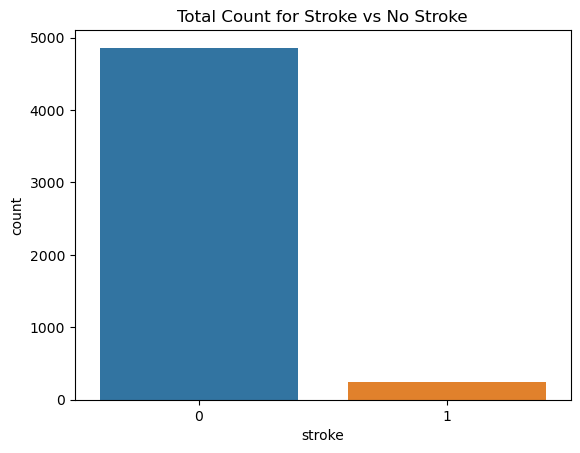

In [23]:
# Plot stroke vs no stroke 
sns.countplot(x=df["stroke"]).set(title='Total Count for Stroke vs No Stroke')
print(f'Total No Stroke: {nstroke[0]}. \nTotal Stroke: {stroke[0]}')

# Save image
plt.savefig("Images/Stroke_NoStroke.png", bbox_inches="tight")

In [24]:
# Find the sum of low risk stroke outcome
low = df_encode['risk_outcome_low'].sum()

In [25]:
# Find the sum of caution risk stroke outcome
caution = df_encode['risk_outcome_caution'].sum()

In [26]:
# Find the sum of high risk stroke outcome
high = df_encode['risk_outcome_high'].sum()

Low Risk: 949. 
Caution Risk: 2686. 
High Risk: 1185


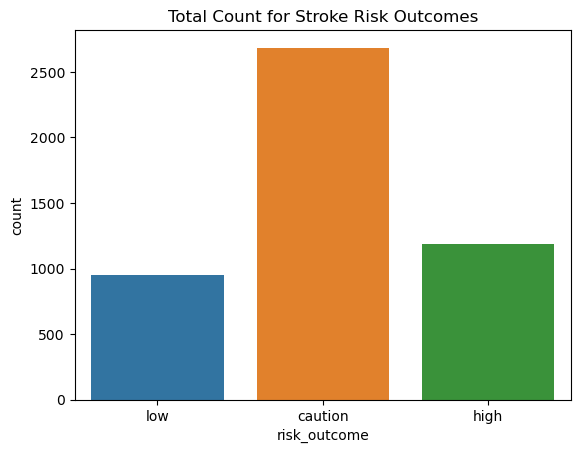

In [27]:
# Plot stroke risk outcomes
sns.countplot(x=df["risk_outcome"]).set(title='Total Count for Stroke Risk Outcomes')
print(f'Low Risk: {low}. \nCaution Risk: {caution}. \nHigh Risk: {high}')

# Save image
plt.savefig("Images/Stroke_Risk_Outcomes.png", bbox_inches="tight")

In [28]:
# Calculate high risk stroke outcome for only females
female_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['gender_Female'] == 1)].count()

In [29]:
# Calculate the average age for high risk stroke outcome for only females
female_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['gender_Female'] == 1)]
female_avg_age = female_df['age'].mean()
female_avg_age

62.1943793911007

In [30]:
# Calculate high risk stroke outcome for only males
male_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['gender_Male'] == 1)].count()

In [31]:
# Calculate the average age for high risk stroke outcome for only males
male_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['gender_Male'] == 1)]
male_avg_age = male_df['age'].mean()
male_avg_age

67.59818731117825

Total High Risk Males: 331, Average Age: 68. 
Total High Risk Females: 854, Average Age: 62.


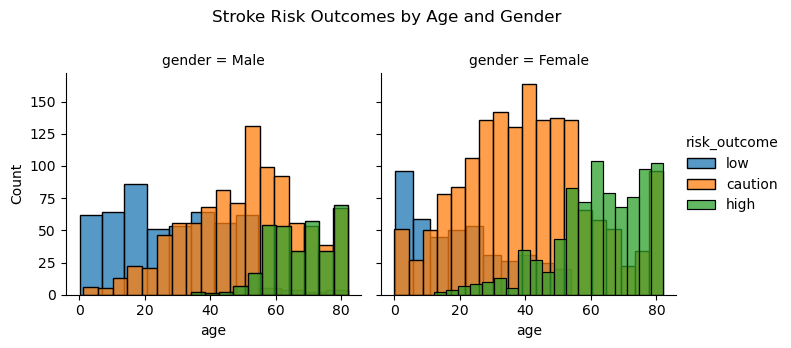

In [32]:
# Age and gender graph
g = sns.FacetGrid(df, col="gender", hue='risk_outcome', height=3.5) #aspect=.65)
g.map(sns.histplot, "age")
g.add_legend()
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Stroke Risk Outcomes by Age and Gender')
print(f'Total High Risk Males: {male_high[0]}, Average Age: {round(male_avg_age)}. \nTotal High Risk Females: {female_high[0]}, Average Age: {round(female_avg_age)}.')

# Save image
plt.savefig("Images/AgeGender_Stroke_Risk_Outcomes.png", bbox_inches="tight")

In [33]:
# Calculate total number of high risk without heart disease
wout_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['heart_disease'] == 0)].count()

In [34]:
# Calculate average age of high risk without heart disease
wout_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['heart_disease'] == 0)]
wout_avg_age = wout_df['age'].mean()
wout_avg_age

62.32398753894081

In [35]:
# Calculate total number of high risk with heart disease
w_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['heart_disease'] == 1)].count()

# Calculate average age of high risk with heart disease
w_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['heart_disease'] == 1)]
w_avg_age = w_df['age'].mean()
w_avg_age

69.6891891891892

Total High Risk Without Heart Disease: 963, Average Age: 62. 
Total High Risk With Heart Disease: 222, Average Age: 70.


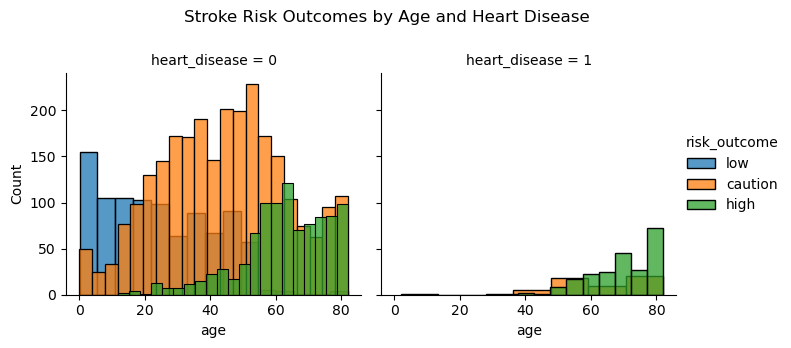

In [36]:
# Age and heart disease graph
g = sns.FacetGrid(df, col="heart_disease", hue='risk_outcome', height=3.5)
g.map(sns.histplot, "age")
g.add_legend()
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Stroke Risk Outcomes by Age and Heart Disease')
print(f'Total High Risk Without Heart Disease: {wout_high[0]}, Average Age: {round(wout_avg_age)}. \nTotal High Risk With Heart Disease: {w_high[0]}, Average Age: {round(w_avg_age)}.')

# Save image
plt.savefig("Images/AgeHeartDisease_Stroke_Risk_Outcomes.png", bbox_inches="tight")

In [38]:
# Calculate total number of high risk without hypertension
wouthyp_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['hypertension'] == 0)].count()

# Calculate average age of high risk without hypertension
wouthyp_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['hypertension'] == 0)]
wouthyp_avg_age = wouthyp_df['age'].mean()
wouthyp_avg_age

62.807644882860664

In [39]:
# Calculate total number of high risk with hypertension
whyp_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['hypertension'] == 1)].count()

# Calculate average age of high risk with hypertension
whyp_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['hypertension'] == 1)]
whyp_avg_age = whyp_df['age'].mean()
whyp_avg_age

65.6470588235294

Total High Risk Without Hypertension: 811, Average Age: 63. 
Total High Risk With Hypertension: 374, Average Age: 66.


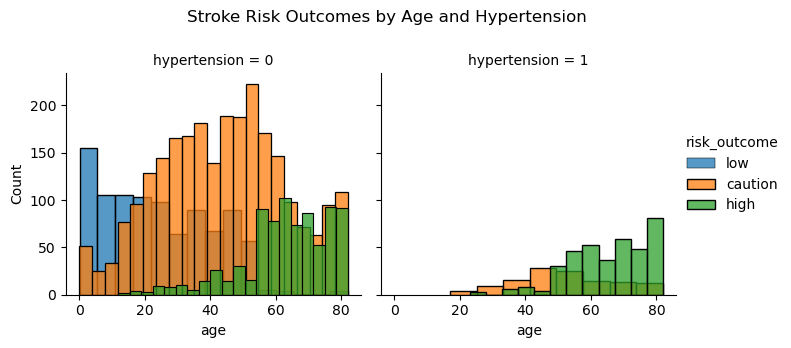

In [40]:
# Age and hypertension graph
g = sns.FacetGrid(df, col="hypertension", hue='risk_outcome', height=3.5)
g.map(sns.histplot, "age")
g.add_legend()
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Stroke Risk Outcomes by Age and Hypertension')
print(f'Total High Risk Without Hypertension: {wouthyp_high[0]}, Average Age: {round(wouthyp_avg_age)}. \nTotal High Risk With Hypertension: {whyp_high[0]}, Average Age: {round(whyp_avg_age)}.')

# Save image
plt.savefig("Images/AgeHypertension_Stroke_Risk_Outcomes.png", bbox_inches="tight")

In [41]:
# Calculate total number of high risk with normal diabetes
norm_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['diabetes_outcome_normal'] == 1)].count()

# Calculate average age of high risk with normal diabetes
norm_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['diabetes_outcome_normal'] == 1)]
norm_avg_age = norm_df['age'].mean()
norm_avg_age

66.88323353293413

In [42]:
# Calculate total number of high risk with prediabetic
prediab_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['diabetes_outcome_prediabetic'] == 1)].count()

# Calculate average age of high risk with prediabetic
prediab_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['diabetes_outcome_prediabetic'] == 1)]
prediab_avg_age = prediab_df['age'].mean()
prediab_avg_age

59.0551948051948

In [43]:
# Calculate total number of high risk with diabetic
diab_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['diabetes_outcome_diabetic'] == 1)].count()

# Calculate average age of high risk with diabetic
diab_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['diabetes_outcome_diabetic'] == 1)]
diab_avg_age = diab_df['age'].mean()
diab_avg_age

64.38489871086556

High Risk Normal: 334, Average Age: 67. 
High Risk Prediabetic: 308, Average Age: 59. 
High Risk Diabetic: 543, Average Age: 64.


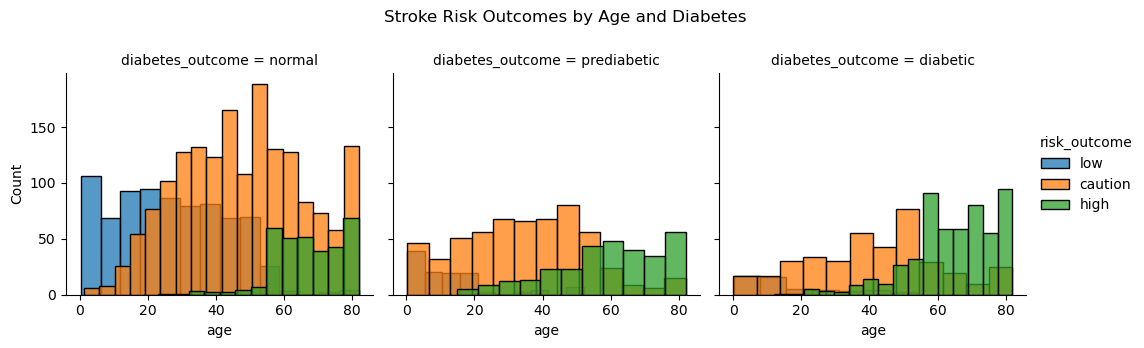

In [44]:
# Age and diabetes graph
g = sns.FacetGrid(df, col="diabetes_outcome", hue='risk_outcome', height=3.5)
g.map(sns.histplot, "age")
g.add_legend()
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Stroke Risk Outcomes by Age and Diabetes')
print(f'High Risk Normal: {norm_high[0]}, Average Age: {round(norm_avg_age)}. \nHigh Risk Prediabetic: {prediab_high[0]}, Average Age: {round(prediab_avg_age)}. \nHigh Risk Diabetic: {diab_high[0]}, Average Age: {round(diab_avg_age)}.')

# Save image
plt.savefig("Images/AgeDiabetes_Stroke_Risk_Outcomes.png", bbox_inches="tight")

In [45]:
# Calculate total number of high risk with underweight bmi
und_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_und_weight'] == 1)].count()

# Calculate average age of high risk with underweight bmi
und_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_und_weight'] == 1)]
und_avg_age = und_df['age'].mean()
und_avg_age

69.5

In [46]:
# Calculate total number of high risk with normal weight bmi
norm_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_normal'] == 1)].count()

# Calculate average age of high risk with normal weight bmi
norm_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_normal'] == 1)]
norm_avg_age = norm_df['age'].mean()
norm_avg_age

70.83823529411765

In [47]:
# Calculate total number of high risk with overweight bmi
over_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_overweight'] == 1)].count()

# Calculate average age of high risk with overweight bmi
over_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_overweight'] == 1)]
over_avg_age = over_df['age'].mean()
over_avg_age

64.69461077844312

In [48]:
# Calculate total number of high risk with obese bmi
obese_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_obese'] == 1)].count()

# Calculate average age of high risk with obese bmi
obese_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_obese'] == 1)]
obese_avg_age = obese_df['age'].mean()
obese_avg_age

65.72327044025157

In [49]:
# Calculate total number of high risk with extremely obese bmi
ext_obese_high = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_ext_obese'] == 1)].count()

# Calculate average age of high risk with extremely obese bmi
ext_obese_df = df_encode.loc[(df_encode['risk_outcome_high'] == 1) & (df_encode['bmi_outcome_ext_obese'] == 1)]
ext_obese_avg_age = ext_obese_df['age'].mean()
ext_obese_avg_age

58.10204081632653

High Risk Underweight: 4, Average Age: 70. 
High Risk Normal: 68, Average Age: 71. 
High Risk Overweight: 501, Average Age: 65. 
High Risk Obese: 318, Average Age: 66. 
High Risk Extremely Obese: 294, Average Age: 58


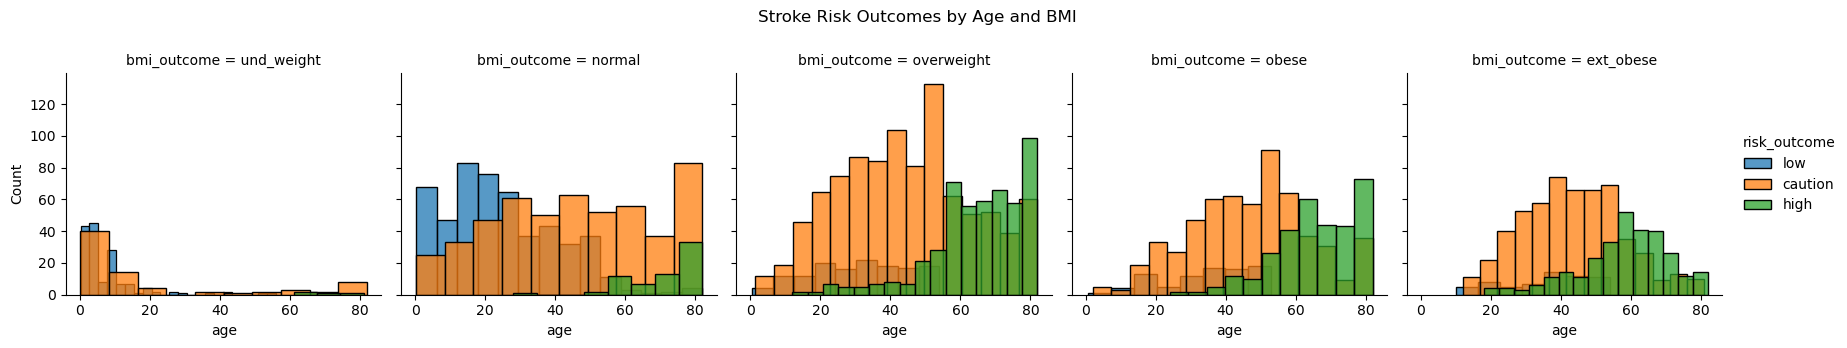

In [50]:
# Age and BMI graph
g = sns.FacetGrid(df,col="bmi_outcome", hue='risk_outcome', height=3.5)
g.map(sns.histplot, "age")
g.add_legend()
g.fig.subplots_adjust(top=.8)
g.fig.suptitle('Stroke Risk Outcomes by Age and BMI')
print(f'High Risk Underweight: {und_high[0]}, Average Age: {round(und_avg_age)}. \nHigh Risk Normal: {norm_high[0]}, Average Age: {round(norm_avg_age)}. \nHigh Risk Overweight: {over_high[0]}, Average Age: {round(over_avg_age)}. \nHigh Risk Obese: {obese_high[0]}, Average Age: {round(obese_avg_age)}. \nHigh Risk Extremely Obese: {ext_obese_high[0]}, Average Age: {round(ext_obese_avg_age)}')

# Save image
plt.savefig("Images/AgeBMI_Stroke_Risk_Outcomes.png", bbox_inches="tight")